In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("heart-disease.csv")
df.head();

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   sex        303 non-null    int64  
 2   cp         303 non-null    int64  
 3   trestbps   303 non-null    int64  
 4   chol       303 non-null    int64  
 5   fbs        303 non-null    int64  
 6   restecg    303 non-null    int64  
 7   thalach    303 non-null    int64  
 8   exang      303 non-null    int64  
 9   oldpeak    303 non-null    float64
 10  slope      303 non-null    int64  
 11  ca         303 non-null    int64  
 12  thal       303 non-null    int64  
 13  condition  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df["condition"].value_counts()

condition
1    165
0    138
Name: count, dtype: int64

In [35]:
## Evaluation 
df["condition"].value_counts(normalize=True)

condition
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='condition'>

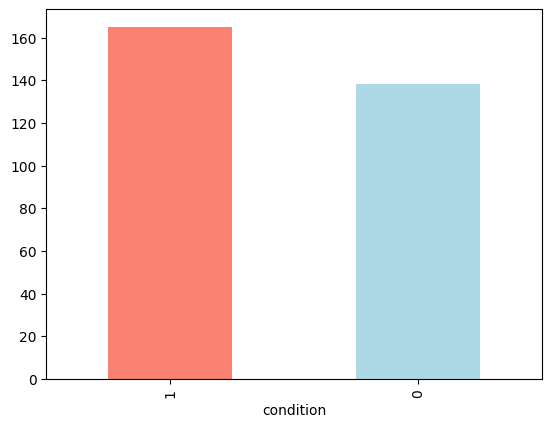

In [38]:
df["condition"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

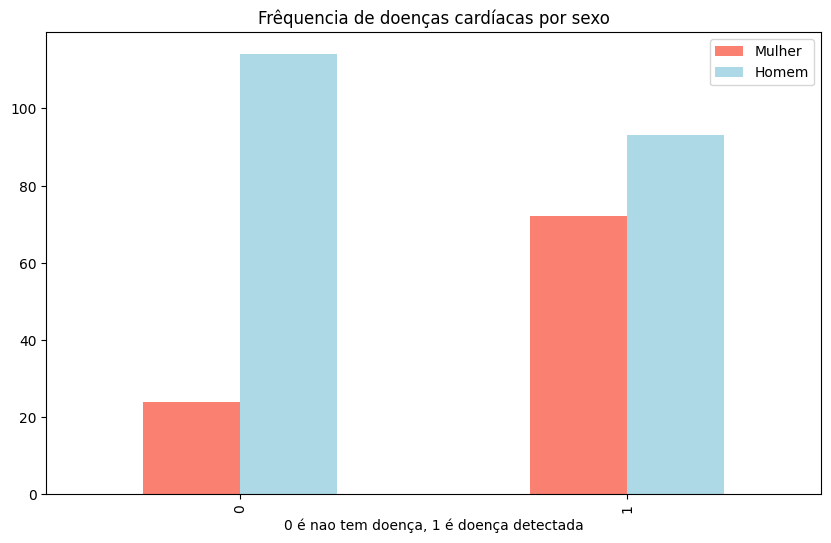

In [42]:
pd.crosstab(df["condition"], df["sex"]).plot(
        kind="bar", 
        figsize=(10,6), 
        color=["salmon", "lightblue"]
        )

plt.title("Frêquencia de doenças cardíacas por sexo")
plt.xlabel("0 é nao tem doença, 1 é doença detectada")
plt.legend(["Mulher", "Homem"])

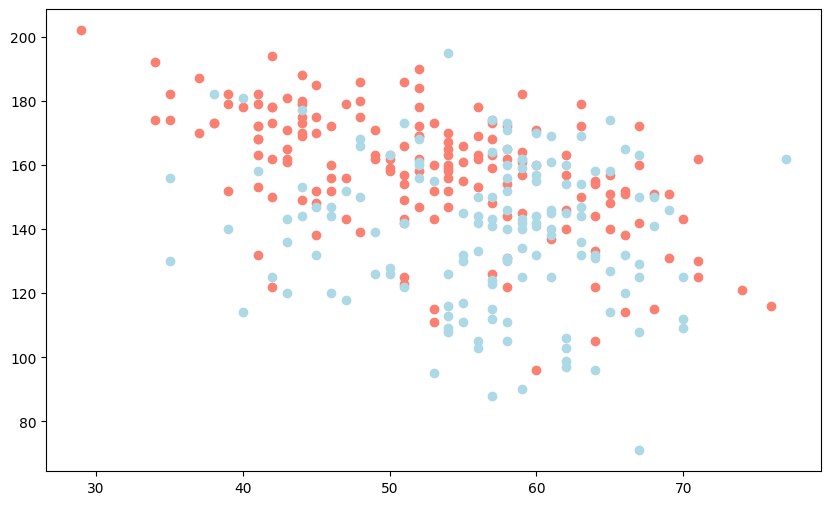

In [45]:
condition = df["condition"]
cx = "salmon"
cy = "lightblue"

plt.figure(figsize=(10, 6))

plt.scatter(df["age"] [condition == 1],
            df["thalach"] [condition == 1],
            c=cx)


plt.scatter(df["age"] [condition == 0],
            df["thalach"] [condition == 0],
            c=cy)